In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [11]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [12]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [33]:
classifier=Sequential() #Sequential---> মানে forward and backword propagation

In [17]:
classifier.add(Dense(units=11,activation='relu'))

In [18]:
classifier.add(Dense(units=7,activation='relu'))

In [19]:
classifier.add(Dense(units=6,activation='relu'))

In [20]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [25]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3378 - accuracy: 0.8580 - val_loss: 0.3723 - val_accuracy: 0.8429
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3384 - accuracy: 0.8597 - val_loss: 0.3691 - val_accuracy: 0.8466
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3386 - accuracy: 0.8606 - val_loss: 0.3691 - val_accuracy: 0.8440
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3381 - accuracy: 0.8572 - val_loss: 0.3700 - val_accuracy: 0.8466
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3379 - accuracy: 0.8578 - val_loss: 0.3688 - val_accuracy: 0.8463
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3374 - accuracy: 0.8602 - val_loss: 0.3727 - val_accuracy: 0.8448
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3379 - accuracy: 0.8567 - val_loss: 0.3673 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

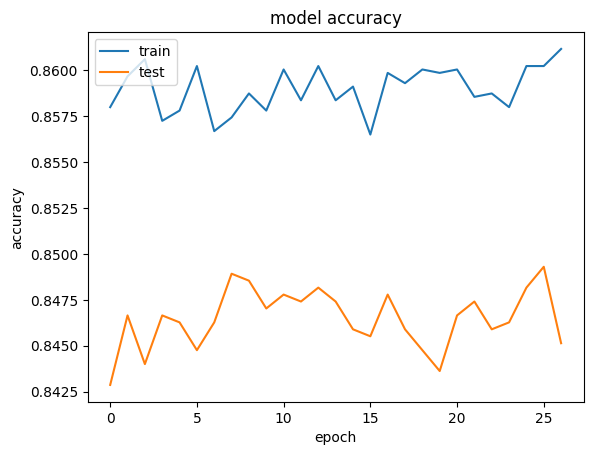

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [29]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 1s 6ms/step


In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1508,   87],
       [ 199,  206]])

In [31]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [32]:
score

0.857